# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
from dateutil.rrule import rrule, MONTHLY
from math import ceil
from pandas.tseries.offsets import MonthEnd, MonthBegin, Day

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
# main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

In [3]:
### YOUR CODE HERE ###

df_courses = pd.read_csv('courses.csv', index_col=0)
df_courses.columns = ["course_id", "course_title", "course_field"]
# df_courses

df_course_contents = pd.read_csv('course_contents.csv')
# df_course_contents

df_progresses = pd.read_csv('progresses.csv')
df_progresses.rename(columns={'id': 'progress_id'}, inplace=True)
# df_progresses

df_progress_phases = pd.read_csv('progress_phases.csv')
# df_progress_phases

main_1 = df_progress_phases.merge(df_progresses, how='inner', right_on='progress_id', left_on='progress_id')
# main_1

main_2 = main_1.merge(df_courses, how='left', right_on='course_id', left_on='course_id')
# main_2

In [4]:
main = main_2.merge(df_course_contents, how='left', on=['module_number', 'lesson_number', 'course_id'])
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
 6   student_id     350677 non-null  object
 7   course_id      350677 non-null  object
 8   course_title   350677 non-null  object
 9   course_field   350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


In [5]:
# ПРОВЕРКА
# main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf']

In [6]:
# Общее количество курсов в датасете

main_courses = main.groupby('course_title').count()
# main_courses
len(main_courses)

15

In [7]:
# Количество модулей на каждом курсе

main_courses_mod = main.groupby('course_title')['module_title'].nunique().sort_values().reset_index()
main_courses_mod

,course_title,module_title
0,PHP-разработчик с 0 до PRO. Часть 1,8
1,Веб-вёрстка для начинающих 2.0,8
2,Excel Базовый,9
3,Java-разработчик c нуля,9
4,SMM-маркетолог от А до Я,11
5,Java-разработчик,17
6,Веб-дизайн PRO 2.0,17
7,Веб-дизайн Базовый,17
8,Руководитель digital-проектов,17
9,JavaScript с нуля,18


In [8]:
# Количество уроков в каждом модуле на каждом курсе

main_courses_mod_les = main.groupby(['course_title', 'module_title'])['lesson_title'].nunique().sort_values().reset_index()
main_courses_mod_les

,course_title,module_title,lesson_title
0,Веб-дизайн с нуля 2.0,Бонус-модуль #2,1
1,Веб-разработчик,Дополнительные модули,1
2,UX-дизайн,Бонус-модуль. Эффектный кейс в 20 000 пикселей...,1
3,Анимация интерфейсов,Бонус-модуль. Экспорт анимации в код. Плагин B...,1
4,Анимация интерфейсов,Бонус-модуль. Практика: разбор кейса Уралсиб,1
...,...,...,...
224,Интернет-маркетолог от Ingate,Таргетированная реклама в социальных сетях,16
225,Интернет-маркетолог от Ingate,Контекстная реклама в Yandex Direct и Google A...,17
226,Интернет-маркетолог от Ingate,"SEO: больше, чем поисковая выдача (обновление ...",19
227,Java-разработчик c нуля,"Числа, строки и даты",27


In [9]:
# Медианное количество уроков в модуле на каждом курсе

median_lessons = main_courses_mod_les.groupby(['course_title'])['lesson_title'].agg('median').sort_values().reset_index()
median_lessons

,course_title,lesson_title
0,Веб-разработчик,2.0
1,Анимация интерфейсов,3.0
2,Веб-дизайн Базовый,3.0
3,UX-дизайн,3.5
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,Веб-дизайн с нуля 2.0,4.0
6,Excel Базовый,5.0
7,Веб-дизайн PRO 2.0,5.0
8,Руководитель digital-проектов,5.0
9,SMM-маркетолог от А до Я,6.0


In [10]:
# Количество учеников на каждом курсе

main_students = main.groupby(['course_title'])['student_id'].nunique().sort_values().reset_index()
main_students

,course_title,student_id
0,SMM-маркетолог от А до Я,506
1,Веб-дизайн Базовый,518
2,Java-разработчик c нуля,581
3,Анимация интерфейсов,598
4,Веб-разработчик,628
5,Руководитель digital-проектов,685
6,Java-разработчик,763
7,Excel Базовый,782
8,PHP-разработчик с 0 до PRO. Часть 1,854
9,JavaScript с нуля,966


In [11]:
# Минимальный, максимальный, средний, медианный возраст студентов

df_students = pd.read_csv('students.csv', index_col=0) # загружаем значения
df_students.rename(columns={'id': 'student_id'}, inplace=True) # приводим столбец к единому обозначению
df_students['birthday'] = pd.to_datetime(df_students['birthday'], errors = 'coerce', yearfirst=True) # переводим в формат даты из float


df_students['today'] = pd.to_datetime("today").normalize() # создаём столбец текущей даты для вычисления
df_students['age'] = ((df_students['today'] - df_students['birthday']) / np.timedelta64(1, 'Y')) # вычисляем возраст, в годах
# df_students.sort_values(by='birthday')#.reset_index()


df_students_sort = df_students[(df_students['age'] > 5) & (df_students['age'] < 100)] # убираем некорректные данные
df_students_sort.agg({'age':['min', 'max', 'mean', 'median']}) # вычисляем возраст

,age
min,7.107607
max,98.947959
mean,30.722259
median,30.075908


In [12]:
# Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

main_stud = main.merge(df_students_sort, how='left', on=['student_id']) # соеденяем с основной таблицей
# main_stud

students_age = main_stud.groupby(['course_title']).agg({'age':['min', 'max', 'mean', 'median']}) # вычисляем возраст по курсам
students_age

age                        \
                                           min        max       mean   
course_title                                                           
Excel Базовый                         8.320499  62.084779  34.666348   
Java-разработчик                      7.107607  65.778216  31.066408   
Java-разработчик c нуля               7.107607  56.231134  31.438144   
JavaScript с нуля                    15.006468  60.554289  30.090374   
PHP-разработчик с 0 до PRO. Часть 1  15.006468  76.182262  32.559389   
SMM-маркетолог от А до Я             18.535630  53.238602  30.376671   
UX-дизайн                            16.473986  86.353587  31.881173   
Анимация интерфейсов                 16.473986  52.480202  31.309043   
Веб-вёрстка для начинающих 2.0       14.877787  60.554289  30.189170   
Веб-дизайн PRO 2.0                   16.098893  60.494055  29.959099   
Веб-дизайн Базовый                   17.057161  52.376161  30.056761   
Веб-дизайн с нуля 2.0                14.768270  76.749009  29.612896   
Веб-разработчик                      15.006468  52.255693  28.986313   
Интернет-маркетолог от Ingate        17.686879  91.555610  32.903542   
Руководитель digital-проектов        19.868991  56.118880  33.372611   

                                                
                                        median  
course_title                                    
Excel Базовый                        34.560600  
Java-разработчик                     30.103288  
Java-разработчик c нуля              30.590635  
JavaScript с нуля                    29.394170  
PHP-разработчик с 0 до PRO. Часть 1  31.182023  
SMM-маркетолог от А до Я             29.766525  
UX-дизайн                            31.286063  
Анимация интерфейсов                 30.743958  
Веб-вёрстка для начинающих 2.0       29.180613  
Веб-дизайн PRO 2.0                   28.693265  
Веб-дизайн Базовый                   29.262750  
Веб-дизайн с нуля 2.0                28.553632  
Веб-разработчик                      28.309958  
Интернет-маркетолог от Ingate        31.863762  
Руководитель digital-проектов        32.780961

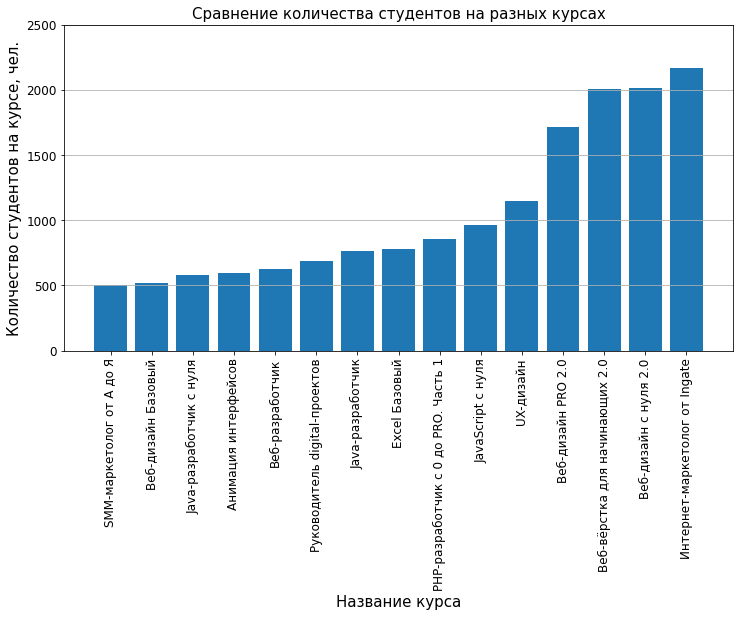

In [13]:
# Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

fig, ax = plt.subplots(figsize=(12, 6))

barlist = ax.bar(main_students['course_title'], main_students['student_id'], align='center')
plt.title('Сравнение количества студентов на разных курсах', size=15)
plt.xlabel('Название курса', size=15)
plt.ylabel('Количество студентов на курсе, чел.', size=15)
plt.xticks(rotation=90, size=12)
plt.yticks(np.arange(0, 3000, step=500), size=12)
ax.grid(axis='y')

plt.show()

<ipython-input-14-296c353c3073>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=list(range(0, main_students_course_field['student_id'].max(), 500)), size=14)


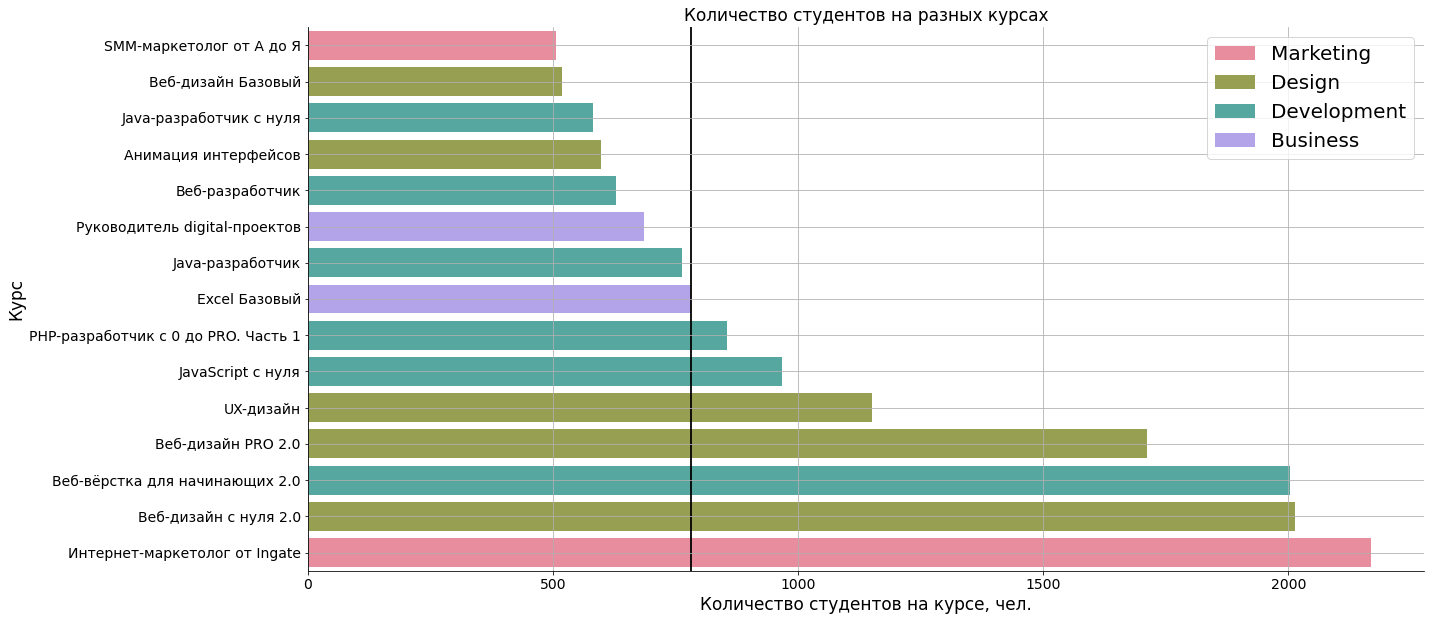

In [14]:
# Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, 
# отражающий количество студентов на каждом курсе. График должен иметь заголовок. 
# Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, 
# к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. 
# На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. 
# Рамки у графика быть не должно ⭐

main_students_course_field = main.groupby(['course_title', 'course_field'])['student_id'].nunique().sort_values().reset_index()
# main_students_course_field

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(y=main_students_course_field.course_title, x=main_students_course_field.student_id, alpha=0.9, 
            hue=main_students_course_field.course_field, palette="husl", dodge=False) # строим график
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False) # убираем рамку

ax.axvspan(xmin=main_students_course_field.student_id.median(), xmax=main_students_course_field.student_id.median(), 
           color='black', alpha=0.9, linewidth=2.0) # отображаем линию медианы

ax.set_title('Количество студентов на разных курсах', size=17)
ax.set_xlabel('Количество студентов на курсе, чел.', size=17)
ax.set_ylabel('Курс', size=17)
ax.set_xticklabels(labels=list(range(0, main_students_course_field['student_id'].max(), 500)), size=14)
ax.set_yticklabels(labels=main_students_course_field['course_title'], size=14)

ax.grid()
ax.legend(loc=1, fontsize=20) # настраиваем легенду

plt.show()

## Выводы по заданию №1

Ниже приведены данные на основе анализа предоставленных датасетов. <br>

#### В представленных данных содержится информация о 15 курсах, а именно:
      * PHP-разработчик с 0 до PRO. Часть 1 - состоящий из 8 модулей - 41 урока - медианное количество уроков 4.0
      * Веб-вёрстка для начинающих 2.0 - состоящий из 8 модулей - 55 уроков - медианное количество уроков 2.0
      * Excel Базовый - состоящий из 9 модулей - 49 уроков - медианное количество уроков 5.0
      * Java-разработчик c нуля - состоящий из 9 модулей - 105 уроков - медианное количество уроков 10.0
      * SMM-маркетолог от А до Я - состоящий из 11 модулей - 62 уроков - медианное количество уроков 6.0
      * Java-разработчик - состоящий из 17 модулей - 114 уроков - медианное количество уроков 7.0
      * Веб-дизайн PRO 2.0 - состоящий из 17 модулей - 66 уроков - медианное количество уроков 5.0
      * Веб-дизайн Базовый - состоящий из 17 модулей - 59 уроков - медианное количество уроков 3.0
      * Руководитель digital-проектов - состоящий из 17 модулей - 96 уроков - медианное количество уроков 5.0
      * JavaScript с нуля - состоящий из 18 модулей - 119 уроков - медианное количество уроков 7.0
      * Интернет-маркетолог от Ingate - состоящий из 18 модулей - 171 урока - медианное количество уроков 6.5
      * Веб-дизайн с нуля 2.0 - состоящий из 19 модулей - 82 уроков - медианное количество уроков 4.0
      * UX-дизайн - состоящий из 20 модулей - 73 уроков - медианное количество уроков 3.5
      * Веб-разработчик - состоящий из 20 модулей - 35 уроков - медианное количество уроков 2.0
      * Анимация интерфейсов - состоящий из 21 модулей - 63 уроков - медианное количество уроков 3.0
               
#### Количество учеников на каждом курсе:
    
      * 0	SMM-маркетолог от А до Я - 511 человек
      * Веб-дизайн Базовый - 518 человек
      * Java-разработчик c нуля - 581 человек
      * Анимация интерфейсов - 598 человек
      * Веб-разработчик - 628 человек
      * Руководитель digital-проектов - 685 человек
      * Java-разработчик - 763 человека
      * Excel Базовый - 782 человека
      * PHP-разработчик с 0 до PRO. Часть 1 - 854 человека
      * JavaScript с нуля - 966 человек
      * UX-дизайн - 1151 человек
      * Веб-дизайн PRO 2.0 - 1711 человек
      * Веб-вёрстка для начинающих 2.0 - 2004 человека
      * Веб-дизайн с нуля 2.0 - 2014 человек
      * Интернет-маркетолог от Ingate - 2168 человек
      
#### Анализ возраста студентов дал следующие показания:      
      
      * Минимальный возраст - 7 лет
      * Средний возраст - 30,6 лет
      * Максимальный возраст - 98,8 лет
      
#### Подробный анализ возраста студентов по курсам можно увидеть в соответствующей таблице.         
      
#### Общий вывод
Из полученных данных можно сделать следующие заключения:
* самым востребованным является курс Интернет-маркетолог от Ingate, на котором зарегистрировано 2168 человек, а самым непопулярным SMM-маркетолог от А до Я с 511 студентами;
* преобладающая сфера по количеству студентов - Разработка;
* меньше всего студентов обучается на курсах в сфере - Бизнес;
* средний возраст студентов составляет 30-31 год;


## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [15]:
## ВАРИАНТ 1
# Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 
# до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

main_stud['start_month'] = pd.to_datetime(main_stud['start_date']).dt.strftime('%Y-%m') # приводим start_date к виду год/мес
# main_stud

main_stud_date = main_stud[(main_stud['start_date'] >= '2016-03') & (main_stud['start_date'] <= '2019-12')] # диапазон дат
# main_stud_date
 
main_stud_start = main_stud_date[((main_stud['is_homework'] == 1) & (main_stud['module_number'] == 1) 
                           & (main_stud['course_title'] != 'Веб-дизайн Базовый')) 
                                 | ((main_stud['is_homework'] == 1) & (main_stud['module_number'] == 3) 
                           & (main_stud['course_title'] == 'Веб-дизайн Базовый'))] # выбираем первую домашку в модулях
# main_stud_start

# # main_stud_start_sort = main_stud_start.groupby(['course_title', 'start_month'])['student_id'].nunique().reset_index()
# # main_stud_start_sort = main_stud_start.groupby(['course_title', 'start_month']).agg({'student_id':'nunique'}).reset_index()
# # main_stud_start_sort

main_stud_start_sort = main_stud_start.pivot_table(values='student_id', index='start_month', columns='course_title', 
                                                  aggfunc=pd.Series.nunique, fill_value=0)
main_stud_start_sort

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
start_month,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-11,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2017-04,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2017-05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2017-06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2017-07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-01,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2018-02,6,14,0,0,0,0,61,14,0,0,56,0,31,76,64


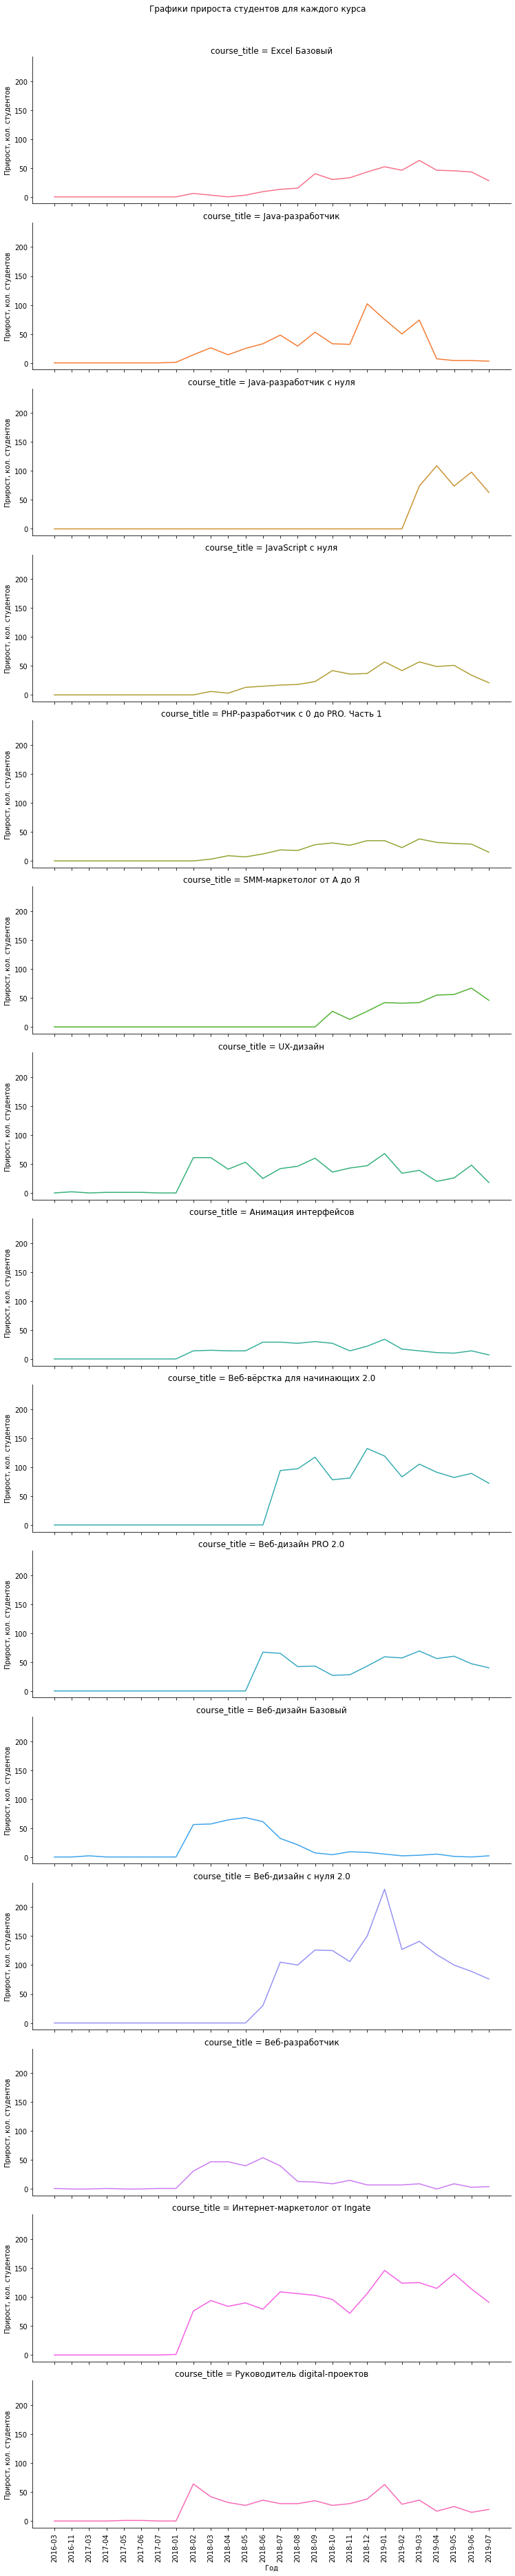

In [16]:
# На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. 
# Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

main_stud_start_sort_1 = main_stud_start_sort.unstack().reset_index() # приводим дф к необходимому виду


g = sns.FacetGrid(main_stud_start_sort_1, row='course_title', height=3.5, aspect=3, hue='course_title')
g.map(sns.lineplot, 'start_month', 0)

g.fig.subplots_adjust(top=0.96) # устанавливаем отступ заголовка
g.set_xlabels('Год')
g.set_ylabels('Прирост, кол. студентов')
g.fig.suptitle('Графики прироста студентов для каждого курса')
g.set_titles(size=12) # устанавливаем размер шрифта заголовка
g.set_xticklabels(rotation=90) # разворачиваем деления по оси х

plt.show()

In [17]:
## ВАРИАНТ 2 (по замечаниям)  

main_var_2_modul = main[(main_stud['is_homework'] == 1)].groupby(['course_title', 'is_homework']).agg({"module_number":"min"})
# main_var_2_modul

main_var_2_modul_merg = main_var_2_modul.merge(main, how='left', on=['course_title', 'is_homework', 'module_number'])
main_var_2_modul_merg['start_month'] = pd.to_datetime(main_var_2_modul_merg['start_date']).dt.strftime('%Y-%m')
# main_var_2_modul_merg

main_var_2_modul_merg_sort = main_var_2_modul_merg.pivot_table(values='student_id', index='start_month', columns='course_title', 
                                                  aggfunc=pd.Series.nunique, fill_value=0)

main_var_2_modul_merg_sort == main_stud_start_sort # проверка совпадения данных в двух ДФ разных вариантов исполнения


course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
start_month,,,,,,,,,,,,,,,
2016-03,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2016-11,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-03,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-04,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-05,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-07,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2018-01,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2018-02,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


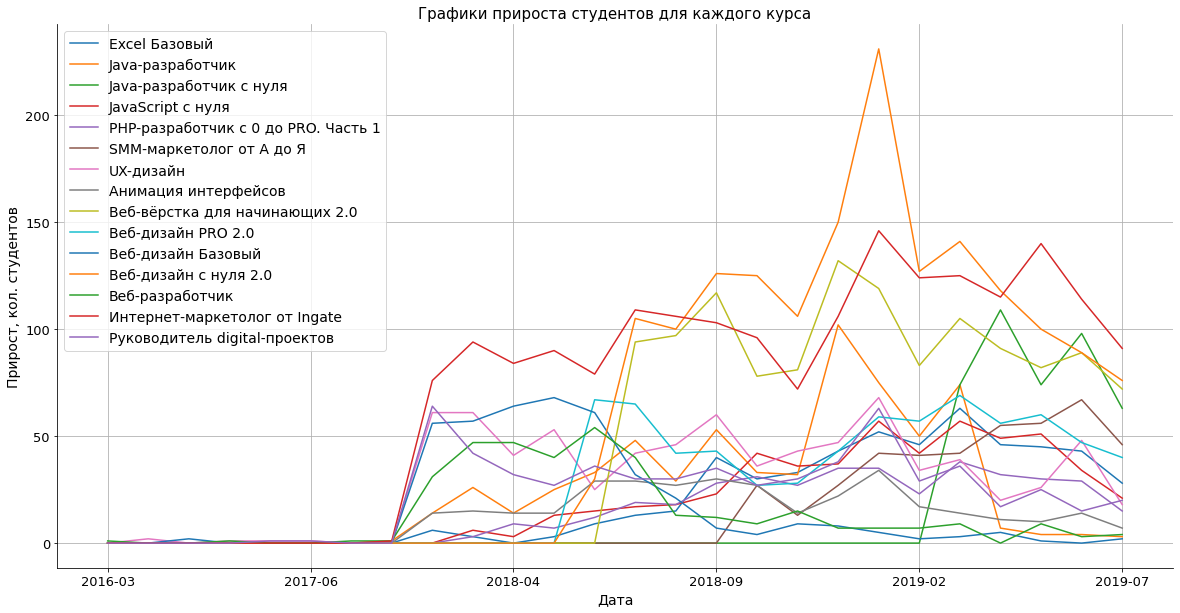

In [18]:
# На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце 
# для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. 
# Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно ⭐

k = main_stud_start_sort.plot(figsize=(20,10))

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False) # убираем рамку
k.set_title('Графики прироста студентов для каждого курса', size=15)
k.set_xlabel('Дата', size=14)
k.set_ylabel('Прирост, кол. студентов', size=14)
k.legend(loc=2, fontsize=14)

plt.grid()
plt.tick_params(labelsize=13)
plt.show()

In [19]:
# (p) Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю 
# (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. 
# Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой 
# (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

main_stud_prog = main[((main['is_homework'] == 1))]


# main_stud_prog['start_month'] = pd.to_datetime(main_stud_prog['start_date']).dt.strftime('%Y-%m')
# main_stud_prog['finish_month'] = pd.to_datetime(main_stud_prog['finish_date']).dt.strftime('%Y-%m')
# main_stud_prog['finish_month'] = main_stud_prog['finish_month'].replace(np.nan, '2019-07')

# main_stud_prog['duration'] = main_stud_prog.apply(lambda row: pd.date_range(row.start_month, row.finish_month), axis=1)


# main_stud_prog

###ВАРИАНТ ПРЕПОДАВАТЕЛЯ

# делаем так, чтобы в start_date стоял первый день месяца, в котором начата дз
# а в finish_date последний день месяца начала, если работа еще не закончена, и то, что есть, если закончена

main_stud_prog['start_date'] = pd.to_datetime(main_stud_prog.start_date, utc = True)
main_stud_prog['finish_date'] = pd.to_datetime(main_stud_prog.finish_date, utc = True)

# приводим все значения к первой дате месяца

main_stud_prog['start_date'] = main_stud_prog['start_date'].apply(lambda x: pd.Timestamp(x) + Day() - MonthBegin())
main_stud_prog['finish_date'] = main_stud_prog[['start_date','finish_date']].apply(lambda x: 
                                pd.Timestamp(x['start_date']) - Day() + MonthEnd() if pd.isna(x['finish_date']) 
                                else x['finish_date'],axis=1)


main_stud_prog['start_date'] = pd.to_datetime(main_stud_prog.start_date, utc = True)
main_stud_prog['finish_date'] = pd.to_datetime(main_stud_prog.finish_date, utc = True)


# делаем список месяцев, в которых выполнялось каждое дз

main_stud_prog['time'] = main_stud_prog[['start_date','finish_date']].apply(lambda x: list(pd.date_range(start=x['start_date'], 
                        periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), 
                                        freq='M')),axis=1)
main_stud_prog

<ipython-input-19-2596fdd6d67c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_stud_prog['start_date'] = pd.to_datetime(main_stud_prog.start_date, utc = True)
<ipython-input-19-2596fdd6d67c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_stud_prog['finish_date'] = pd.to_datetime(main_stud_prog.finish_date, utc = True)
<ipython-input-19-2596fdd6d67c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,time
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-01 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,[2018-06-30 19:10:36.957891+00:00]
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-01 08:31:00.338883+00:00,2018-06-30 08:31:00.338883+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,[2018-06-30 08:31:00.338883+00:00]
12,a97393fe164b448e7231c07d48c82f9e,2,6,start,2018-03-01 14:14:44.814222+00:00,2018-03-31 14:14:44.814222+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Домашняя работа,bae729ef-e399-4ed8-a62b-c8195ed754aa,False,True,[2018-03-31 14:14:44.814222+00:00]
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-01 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,[2018-02-28 12:30:34.638431+00:00]
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-01 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Основы работы с графикой,Домашняя работа,e362bb6e-4ab4-4533-985e-d728300e4c32,False,True,[2018-10-31 19:41:04.983571+00:00]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350640,64214d35e6450476bbf2e4a66f3dcf11,1,9,done,2019-05-01 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,"[2019-05-31 21:47:11.114080+00:00, 2019-06-30 ..."
350642,64214d35e6450476bbf2e4a66f3dcf11,4,5,done,2019-06-01 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Работа со стилями. Создание GUI,Домашняя работа,7b35fbae-e93e-42d4-a24e-4ec54045eb19,False,True,[2019-06-30 10:49:00.444537+00:00]
350659,64214d35e6450476bbf2e4a66f3dcf11,3,4,done,2019-06-01 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,"Тренды, подготовка, мудборды",Домашняя работа,6122e61d-b908-4fca-a852-78b55dffc432,False,True,[2019-06-30 15:35:10.566121+00:00]
350665,ea9c93865c1de54a5079b7ae71c88683,1,7,done,2019-06-01 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,[2019-06-30 18:58:02.292673+00:00]


In [20]:
# main_stud_prog_2 = main_stud_prog.explode('duration')#.reset_index() # разворачиваем таблицу по всем имеющимся датам

# main_stud_prog_2['duration'] = pd.to_datetime(main_stud_prog_2['duration']).dt.strftime('%Y-%m')

# main_stud_prog_2


##Вариант преподавателя

main_stud_prog_2 = main_stud_prog.explode('time')

main_stud_prog_2['time'] = pd.to_datetime(main_stud_prog_2['time']).dt.strftime('%Y-%m')

main_stud_prog_2



,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,time
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-01 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-01 08:31:00.338883+00:00,2018-06-30 08:31:00.338883+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,2018-06
12,a97393fe164b448e7231c07d48c82f9e,2,6,start,2018-03-01 14:14:44.814222+00:00,2018-03-31 14:14:44.814222+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Домашняя работа,bae729ef-e399-4ed8-a62b-c8195ed754aa,False,True,2018-03
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-01 12:30:34.638431+00:00,2018-02-20 09:16:50.297369+00:00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,2018-02
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-01 19:41:04.983571+00:00,2018-10-05 17:02:51.913911+00:00,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Основы работы с графикой,Домашняя работа,e362bb6e-4ab4-4533-985e-d728300e4c32,False,True,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350640,64214d35e6450476bbf2e4a66f3dcf11,1,9,done,2019-05-01 21:47:11.114080+00:00,2019-06-04 10:09:06.784550+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,2019-06
350642,64214d35e6450476bbf2e4a66f3dcf11,4,5,done,2019-06-01 10:49:00.444537+00:00,2019-06-18 21:08:15.061297+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Работа со стилями. Создание GUI,Домашняя работа,7b35fbae-e93e-42d4-a24e-4ec54045eb19,False,True,2019-06
350659,64214d35e6450476bbf2e4a66f3dcf11,3,4,done,2019-06-01 15:35:10.566121+00:00,2019-06-10 14:40:25.772859+00:00,ab6cc20a19933a22031732f86982f4d2,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,"Тренды, подготовка, мудборды",Домашняя работа,6122e61d-b908-4fca-a852-78b55dffc432,False,True,2019-06
350665,ea9c93865c1de54a5079b7ae71c88683,1,7,done,2019-06-01 18:58:02.292673+00:00,2019-07-01 07:39:47.933005+00:00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,2019-06


In [21]:
# main_stud_prog_2_mod = main_stud_prog_2[((main_stud_prog_2['status'] == 'done'))]
# main_stud_prog_2_mod = main_stud_prog_2.groupby(['course_title', 'duration']).agg({'progress_id':['count']})
# main_stud_prog_2_mod.reset_index()

# main_stud_prog_2_sort = main_stud_prog_2.pivot_table(values='progress_id', index='duration', columns='course_title', 
#                                                   aggfunc=pd.Series.nunique, fill_value=0) # считаем количество прогрессов

# main_stud_prog_2_sort

###Вариант преподавателя

main_stud_prog_2_sort = main_stud_prog_2.pivot_table(values='progress_id', index='time', columns='course_title', 
                                                  aggfunc='count', fill_value=0) # считаем количество прогрессов

main_stud_prog_2_sort

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
time,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2016-11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0
2017-04,0,0,0,0,0,0,2,0,0,0,4,0,1,0,0
2017-05,0,0,0,0,0,0,3,0,0,0,2,0,2,0,1
2017-06,0,0,0,0,0,0,6,0,0,0,1,0,2,0,2


In [22]:
# (m) Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. 
# Ticks нужно развернуть так, чтобы они были читаемы

main_stud_prog_2_sort_15 = main_stud_prog_2_sort.unstack().reset_index() # приводим дф к необходимому виду
main_stud_prog_2_sort_15

# g = sns.FacetGrid(main_stud_prog_2_sort_15, row='course_title', height=3.5, aspect=3, hue='course_title')
# g.map(sns.lineplot, 'time', 0)

# g.fig.subplots_adjust(top=0.97) # устанавливаем отступ заголовка
# g.set_xlabels('Дата')
# g.set_ylabels('Количество прогрессов')
# g.fig.suptitle('Графики количества прогрессов для каждого курса')
# g.set_titles(size=12) # устанавливаем размер шрифта заголовка
# g.set_xticklabels(rotation=90) # разворачиваем деления по оси х

# plt.show()

,course_title,time,0
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0
3,Excel Базовый,2017-01,0
4,Excel Базовый,2017-02,0
...,...,...,...
430,Руководитель digital-проектов,2019-03,385
431,Руководитель digital-проектов,2019-04,282
432,Руководитель digital-проектов,2019-05,291
433,Руководитель digital-проектов,2019-06,231


<ipython-input-23-4f2eff23eed6>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=main_stud_prog_2_sort.index, rotation=90.0)


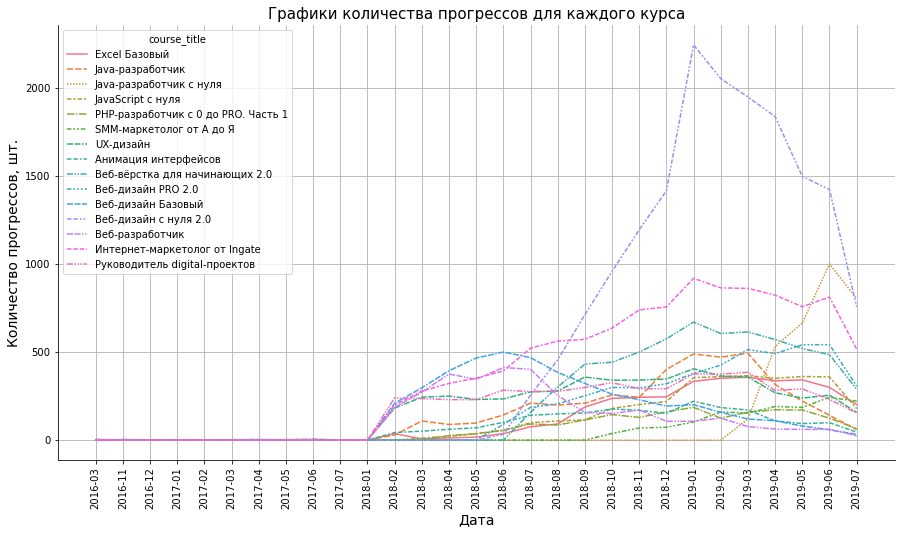

In [23]:
# (m) Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. 
# Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. 
# Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно ⭐

### Вариант через sns.lineplot

fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=main_stud_prog_2_sort)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False) # убираем рамку

ax.set_title('Графики количества прогрессов для каждого курса', size=15)
ax.set_xlabel('Дата', size=14)
ax.set_ylabel('Количество прогрессов, шт.', size=14)
ax.set_xticklabels(labels=main_stud_prog_2_sort.index, rotation=90.0)
ax.grid()


plt.show()

## Выводы по заданию №2

Ниже приведены данные на основе анализа предоставленных датасетов. <br>

#### Выводы по приросту студентов:

      * Как можно увидеть, по части курсов прирост начался с 01.2018, что может свидетельствовать об успешной рекламной компании или о начале регистрации на курсе;
      * Из полученных графиков можно сделать вывод о том, что пиковые значения прироста количества студентов происходили в период с 11.2018 по 06.2019;
      * Лидеры среди курсов по максимальному приросту студентов за месяц: Веб-дизайн с нуля - 559 человек, Интернет-маркетолог от Ingate - 315 человек, Веб-вёрстка для начинающих 2.0 - 216 человек; 
      * Отстающие среди курсов по максимальному приросту студентов за месяц: Веб-разработчик - 54 человека, PHP-разработчик с 0 до PRO. Часть 1 - 35 человек, Анимация интерфейсов - 34 человека;
      * Анализируя полученные графики можно предположить, что некоторые курсы были запущены позже основной массы.
                
#### Выводы по прогрессам:
    
      * Сравнивая графики прироста студентов на курсах и графики прогресса, можно сделать вывод о том, что данные значения кореллируют между собой, чем выше прирост, тем больше сдаётся домашних заданий;
      * На графиках видно, что после 01-2019/02-2019 количество прогрессов снижается (кроме курса Java-разработчик с нуля). Это также подтверждает факт снижения прироста студентов на курсах;
      * Из графиков сложно выделить сезонность по временам года
       
      
#### Общий вывод

Из полученных данных можно сделать следующие заключения:
* начало активной работы курсов - с 01.2018;
* есть курсы которые значительно отстают по количеству студентов, нужно либо принять меры по их продвижению, либо отказаться от их поддержки;
* есть определённый процент студентов которые бросают занятия на курсе и не сдают домашние задания.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [24]:
# (p) Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля 
# (разность между временем начала и окончания выполнения домашней работы) для каждого курса. 
# Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой 
# домашней работы и временем окончания выполнения последней домашней работы в модуле.

main_3 = main[((main['is_homework'] == 1))] # оставляем только ДЗ
# main_3

# находим даты начала первых уроков
main_var_2_modul_min = main_3.groupby(['course_title', "module_title"]).agg({'lesson_number':"min"}).sort_values(by='lesson_number').reset_index()

# объединяем с основным датасетом оставляя только первые уроки
main_var_2_modul_min_merge = main_var_2_modul_min.merge(main_3, how='left', on=['course_title', 'module_title', 'lesson_number'])

# находим последние домашние задания в модулях
main_3_modul_dif = main_3.groupby(['course_title', "module_title"])['lesson_number'].agg(['min', 'max'])
main_3_modul_dif = main_3_modul_dif[(main_3_modul_dif["max"] > main_3_modul_dif["min"])].reset_index()
main_3_modul_max = main_3_modul_dif.rename({'max': 'lesson_number'}, axis=1)
del main_3_modul_max['min']

# объединяем с основным датасетом оставляя только крайние уроки в модулях
main_3_modul_max_merge = main_3_modul_max.merge(main_3, how='left', on=['course_title', 'module_title', 'lesson_number'])

# соединяем начальные уроки в модулях с последними
main_3_merge = pd.concat([main_var_2_modul_min_merge, main_3_modul_max_merge], sort=False, axis=0)
main_3_merge = main_3_merge[['course_title', 'module_title', 'student_id', 'start_date', 'finish_date']]

# приводим формат дат
# 1 убираем отрицательные значения
main_3_merge['start_date'] = pd.to_datetime(main_3_merge['start_date']).dt.strftime('%Y/%m/%d/%H:%M')
main_3_merge['finish_date'] = pd.to_datetime(main_3_merge['finish_date']).dt.strftime('%Y/%m/%d/%H:%M')
# 2 приводим формат дат к виду для вычисления
main_3_merge['start_date'] = pd.to_datetime(main_3_merge.start_date, utc = True)
main_3_merge['finish_date'] = pd.to_datetime(main_3_merge.finish_date, utc = True)

# расчитываем затраченое время на каждое ДЗ
main_3_merge['spended_time'] = (main_3_merge['finish_date'] - main_3_merge['start_date']) / np.timedelta64(1, 'D')

# удаляем NaN в столбце 'finish_date'
main_3_merge.dropna(subset = ['finish_date'], inplace=True)

main_3_merge.sort_values(by='spended_time')

,course_title,module_title,student_id,start_date,finish_date,spended_time
7469,Веб-дизайн Базовый,"Цвет, атмосфера, тексты и здравый смысл",db7e915758ed2901c0b167b5b9e7d14a,2018-10-23 19:10:00+00:00,2018-10-23 19:10:00+00:00,0.000000
29782,Руководитель digital-проектов,Scrum. Передовая методология управления digita...,8ae3d4d373fbfff299b5f0eb50c2397c,2018-09-28 16:11:00+00:00,2018-09-28 16:11:00+00:00,0.000000
49506,Руководитель digital-проектов,Оценка и декомпозиция digital-проектов,c7623c47650fb1ade9268e2d3835655c,2018-02-22 07:43:00+00:00,2018-02-22 07:43:00+00:00,0.000000
29791,Руководитель digital-проектов,Scrum. Передовая методология управления digita...,17c408ab90a10bbe05305778c28630c1,2018-12-10 08:03:00+00:00,2018-12-10 08:03:00+00:00,0.000000
29820,Руководитель digital-проектов,Scrum. Передовая методология управления digita...,c7623c47650fb1ade9268e2d3835655c,2018-02-22 07:43:00+00:00,2018-02-22 07:43:00+00:00,0.000000
...,...,...,...,...,...,...
28980,Интернет-маркетолог от Ingate,Исследование целевой аудитории: портретировани...,04988b4511caaa3c74b572a3179799c2,2018-03-11 11:17:00+00:00,2019-06-11 14:51:00+00:00,457.148611
30020,Руководитель digital-проектов,Переговорные навыки. Провокации. Работа с возр...,aa60999058ab712153b09abf96663853,2018-03-05 13:21:00+00:00,2019-06-06 08:10:00+00:00,457.784028
28507,Интернет-маркетолог от Ingate,Исследование целевой аудитории: портретировани...,8cd7b714b2151c1fbfdcc166a7c474b3,2018-03-12 12:32:00+00:00,2019-06-19 19:56:00+00:00,464.308333
46200,Java-разработчик,Объекты и классы,aea184c1176260e413ccbf035affc626,2018-03-05 14:59:00+00:00,2019-06-24 04:36:00+00:00,475.567361


In [25]:
# main_3_spended_time = main_3_merge.groupby(['course_title', 'module_title']).agg({'spended_time': ['min', 'max', 'mean', 'median']}).reset_index()
main_3_spended_time = main_3_merge.groupby(['course_title', 'module_title'])['spended_time'].agg(['min', 'max', 'mean', 'median'])
main_3_spended_time.reset_index().sort_values(by='median')

,course_title,module_title,min,max,mean,median
173,Интернет-маркетолог от Ingate,Юридическая сторона рекламы,0.000000,57.920139,4.975398,1.019444
153,Веб-разработчик,О программе,0.000000,144.780556,6.376549,1.111458
33,Java-разработчик c нуля,"Числа, строки и даты",0.000694,38.656944,3.341773,1.394444
5,Excel Базовый,Формулы и функции Excel. Введение,0.000000,89.133333,3.413351,1.496528
53,PHP-разработчик с 0 до PRO. Часть 1,Введение в программирование,0.000000,284.788889,8.387125,1.680556
...,...,...,...,...,...,...
50,JavaScript с нуля,Экзаменационное задание,10.529167,92.497917,45.646688,41.970833
75,UX-дизайн,Техника успешной презентации,0.000000,300.488889,69.653072,44.050347
71,UX-дизайн,Visual design теория и практика,0.000000,342.111806,64.719874,55.723611
114,Веб-дизайн Базовый,Дипломная работа,9.838889,425.157639,85.182630,62.928819


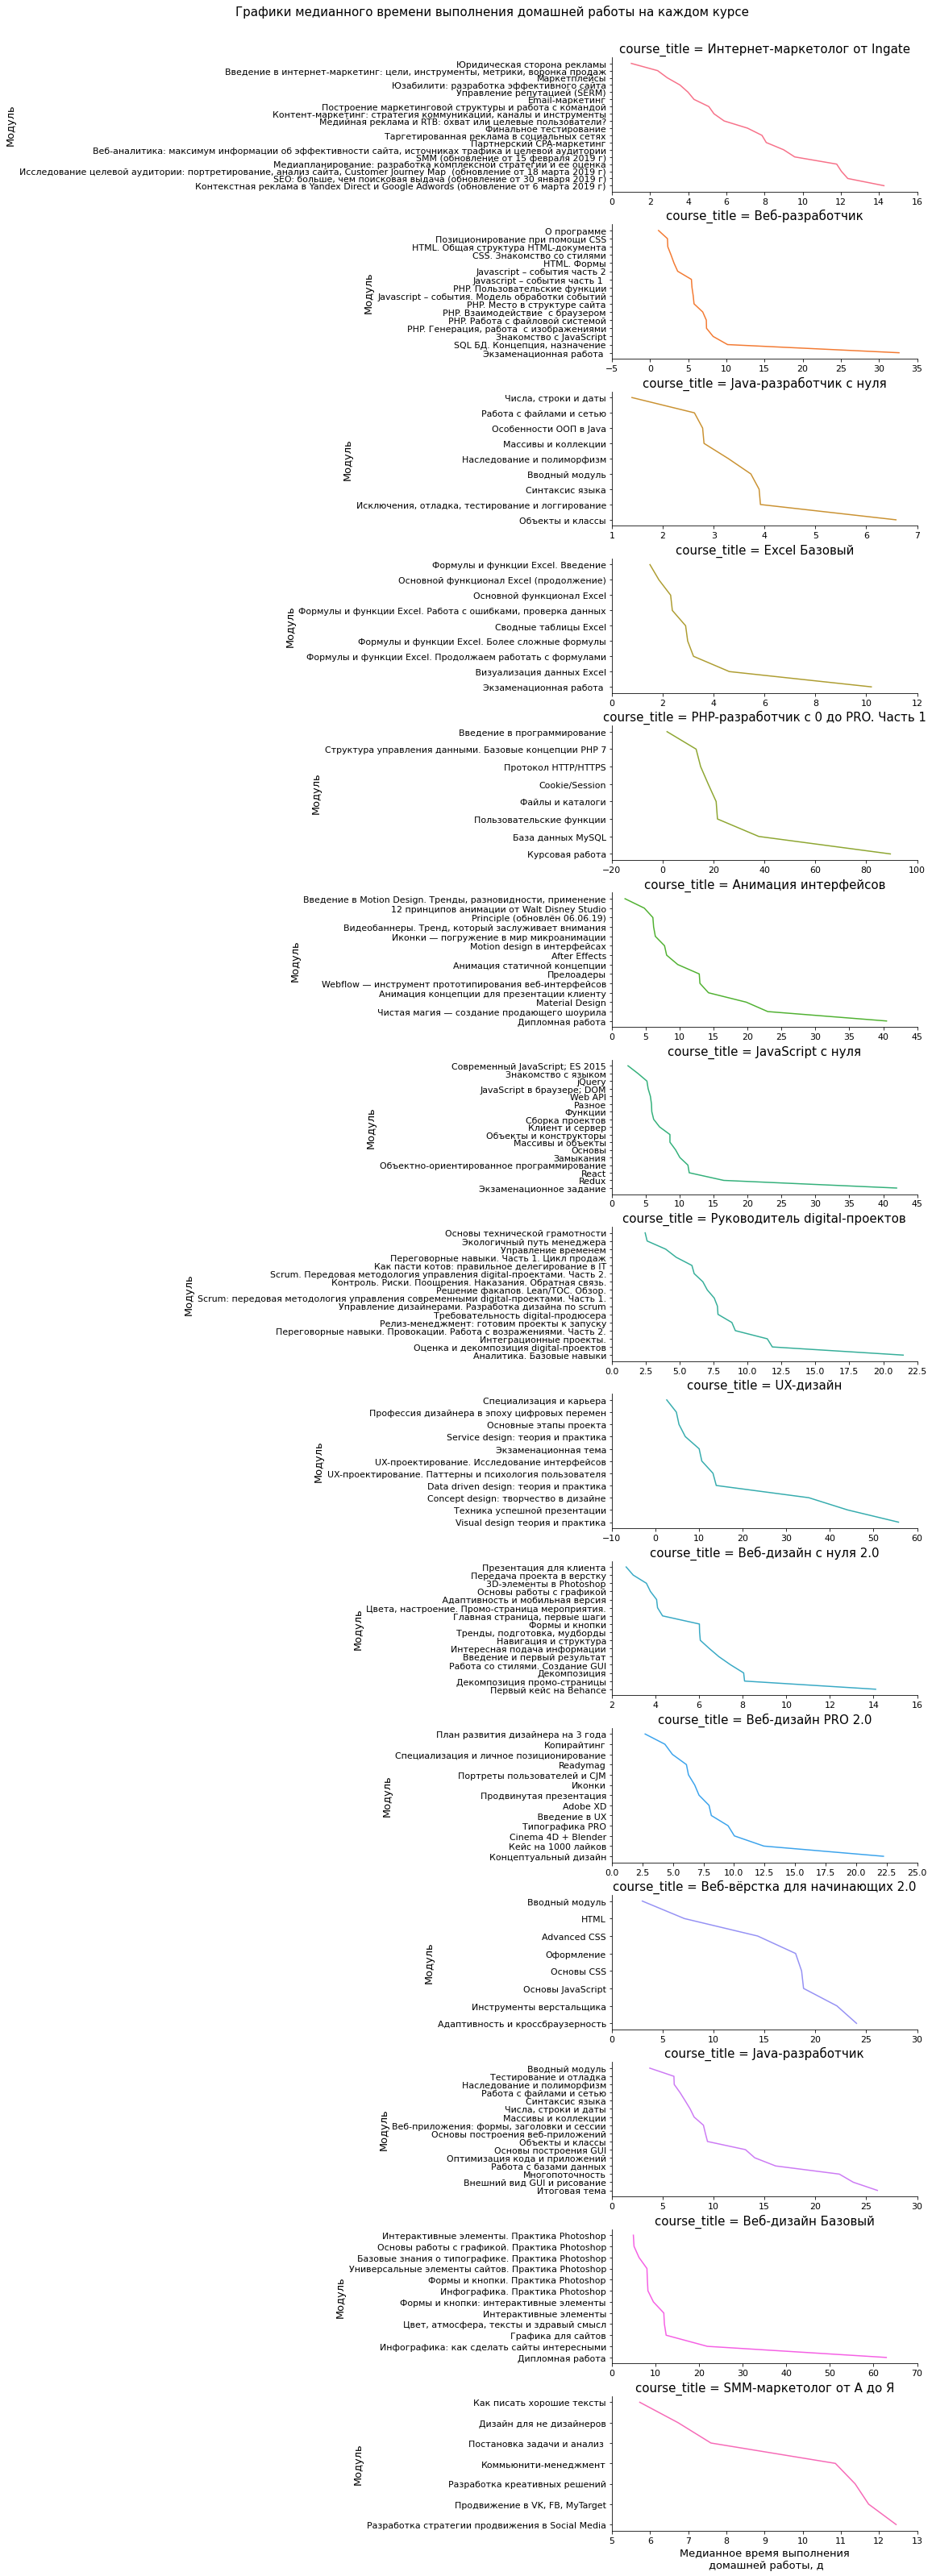

In [26]:
# (m) На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 
# 15 графиков. Графики должны иметь заголовки

main_3_spended_time_15 = main_3_spended_time.reset_index() # приводим дф к необходимому виду
main_3_spended_time_15 = main_3_spended_time_15[['course_title', 'module_title', 'median']].sort_values(by='median')

g = sns.FacetGrid(main_3_spended_time_15, row='course_title', height=3,
                  aspect=5, hue='course_title', 
                  sharex=False, sharey=False)
g.map(sns.lineplot, 'median', 'module_title')

g.fig.subplots_adjust(top=0.96) # устанавливаем отступ заголовка

g.set_xlabels('Медианное время выполнения\n домашней работы, д', size=13)
g.set_ylabels('Модуль', size=13)
g.fig.suptitle('Графики медианного времени выполнения домашней работы на каждом курсе', size=15)
g.set_titles(size=15) # устанавливаем размер шрифта заголовка
g.set_xticklabels(size=11) # устанавливаем размер шрифта по оси х
g.set_yticklabels(size=11) # устанавливаем размер шрифта по оси у

plt.show()

In [27]:
# (p) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы 
# по месяцам (12 месяцев, январь-декабрь) для каждого курса

main_3_3 = main_3_merge
# main_3_3 = main_3

main_3_3['start_date'] = pd.to_datetime(main_3_3.start_date, utc = True)
main_3_3['finish_date'] = pd.to_datetime(main_3_3.finish_date, utc = True)

# приводим все значения к первой дате месяца

main_3_3['start_date'] = main_3_3['start_date'].apply(lambda x: pd.Timestamp(x) + Day() - MonthBegin())
main_3_3['finish_date'] = main_3_3[['start_date','finish_date']].apply(lambda x: 
                                pd.Timestamp(x['start_date']) - Day() + MonthEnd() if pd.isna(x['finish_date']) 
                                else x['finish_date'],axis=1)


main_3_3['start_date'] = pd.to_datetime(main_3_3.start_date, utc = True)
main_3_3['finish_date'] = pd.to_datetime(main_3_3.finish_date, utc = True)

# делаем список месяцев, в которых выполнялось каждое дз

main_3_3['month'] = main_3_3[['start_date','finish_date']].apply(lambda x: list(pd.date_range(start=x['start_date'], 
                        periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), 
                                        freq='M')),axis=1)

main_3_3

,course_title,module_title,student_id,start_date,finish_date,spended_time,month
0,Веб-дизайн Базовый,Дипломная работа,125f9c1b4b5da2e62f8d21b0a2f1fbaf,2018-12-01 17:47:00+00:00,2019-02-08 11:14:00+00:00,50.727083,"[2018-12-31 17:47:00+00:00, 2019-01-31 17:47:0..."
1,Веб-дизайн Базовый,Дипломная работа,cab603a2087ba3ead3a0482cf9a48cf1,2018-12-01 18:35:00+00:00,2019-07-15 11:52:00+00:00,219.720139,"[2018-12-31 18:35:00+00:00, 2019-01-31 18:35:0..."
2,Веб-дизайн Базовый,Дипломная работа,8c83d6ea61ef953c42b409f28e97451f,2019-05-01 06:00:00+00:00,2019-05-31 17:52:00+00:00,22.494444,"[2019-05-31 06:00:00+00:00, 2019-06-30 06:00:0..."
3,Веб-дизайн Базовый,Дипломная работа,aab6c3ca3ab430009e7b0aea36498521,2018-11-01 14:36:00+00:00,2019-02-18 07:25:00+00:00,87.700694,"[2018-11-30 14:36:00+00:00, 2018-12-31 14:36:0..."
4,Веб-дизайн Базовый,Дипломная работа,178404593d902b5dddce67f2022581f9,2018-10-01 12:36:00+00:00,2019-03-22 17:02:00+00:00,155.184722,"[2018-10-31 12:36:00+00:00, 2018-11-30 12:36:0..."
...,...,...,...,...,...,...,...
690,Веб-дизайн PRO 2.0,Введение в UX,5d172149e4d05e71c49bc8223d78ca8f,2018-08-01 11:57:00+00:00,2018-09-11 19:14:00+00:00,23.303472,"[2018-08-31 11:57:00+00:00, 2018-09-30 11:57:0..."
691,Веб-дизайн PRO 2.0,Введение в UX,8eee408fbf71b3f0a1094f5acda3e1d2,2018-11-01 23:17:00+00:00,2018-11-23 20:36:00+00:00,1.888194,[2018-11-30 23:17:00+00:00]
692,Веб-дизайн PRO 2.0,Введение в UX,03e11d8813bfd5d838946989530b8e68,2019-03-01 05:09:00+00:00,2019-03-19 17:37:00+00:00,0.519444,[2019-03-31 05:09:00+00:00]
693,Веб-дизайн PRO 2.0,Введение в UX,14df4afe8c75412de77f18d9053f5085,2018-10-01 07:26:00+00:00,2018-11-05 18:25:00+00:00,23.457639,"[2018-10-31 07:26:00+00:00, 2018-11-30 07:26:0..."


In [28]:
main_3_3_expl = main_3_3.explode('month') # раскладываем датафрейм по всем месяцам выполнения дз

main_3_3_expl['month'] = pd.to_datetime(main_3_3_expl['month']).dt.strftime('%m') # переводим к виду месяца 01-12

main_3_3_expl

,course_title,module_title,student_id,start_date,finish_date,spended_time,month
0,Веб-дизайн Базовый,Дипломная работа,125f9c1b4b5da2e62f8d21b0a2f1fbaf,2018-12-01 17:47:00+00:00,2019-02-08 11:14:00+00:00,50.727083,12
0,Веб-дизайн Базовый,Дипломная работа,125f9c1b4b5da2e62f8d21b0a2f1fbaf,2018-12-01 17:47:00+00:00,2019-02-08 11:14:00+00:00,50.727083,01
0,Веб-дизайн Базовый,Дипломная работа,125f9c1b4b5da2e62f8d21b0a2f1fbaf,2018-12-01 17:47:00+00:00,2019-02-08 11:14:00+00:00,50.727083,02
1,Веб-дизайн Базовый,Дипломная работа,cab603a2087ba3ead3a0482cf9a48cf1,2018-12-01 18:35:00+00:00,2019-07-15 11:52:00+00:00,219.720139,12
1,Веб-дизайн Базовый,Дипломная работа,cab603a2087ba3ead3a0482cf9a48cf1,2018-12-01 18:35:00+00:00,2019-07-15 11:52:00+00:00,219.720139,01
...,...,...,...,...,...,...,...
691,Веб-дизайн PRO 2.0,Введение в UX,8eee408fbf71b3f0a1094f5acda3e1d2,2018-11-01 23:17:00+00:00,2018-11-23 20:36:00+00:00,1.888194,11
692,Веб-дизайн PRO 2.0,Введение в UX,03e11d8813bfd5d838946989530b8e68,2019-03-01 05:09:00+00:00,2019-03-19 17:37:00+00:00,0.519444,03
693,Веб-дизайн PRO 2.0,Введение в UX,14df4afe8c75412de77f18d9053f5085,2018-10-01 07:26:00+00:00,2018-11-05 18:25:00+00:00,23.457639,10
693,Веб-дизайн PRO 2.0,Введение в UX,14df4afe8c75412de77f18d9053f5085,2018-10-01 07:26:00+00:00,2018-11-05 18:25:00+00:00,23.457639,11


In [29]:
# main_3_3_expl_sort = main_3_3_expl.pivot_table(values='module_title', index='month', columns='course_title', 
#                                                   aggfunc='count', fill_value=0) # считаем количество прогрессов

main_3_3_expl_sort = main_3_3_expl.pivot_table(values='spended_time', index='month', columns='course_title', 
                                                  aggfunc=np.median, fill_value=0) # считаем количество прогрессов

# main_3_3_expl_sort = main_3_3_expl.groupby(['course_title', 'module_title'])['month'].agg(['min', 'max', 'mean', 'median'])
# main_3_3_expl_sort.reset_index().sort_values(by='median')

main_3_3_expl_sort

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
month,,,,,,,,,,,,,,,
01,2.875347,8.207292,0.000000,9.356250,28.211458,22.113889,33.550694,14.565972,19.201736,21.170833,40.381944,7.181597,26.010764,10.840278,10.896528
02,2.979167,8.454861,0.000000,9.529167,46.924306,16.503472,12.799306,9.760069,23.052431,15.270139,10.833333,8.706250,8.678472,7.864583,4.906250
03,3.651389,9.281597,6.943750,8.809028,24.197917,15.314236,20.085764,14.459722,20.938194,12.013194,16.795139,7.307639,17.593750,11.430903,9.729861
04,2.887500,16.622569,4.159375,7.881250,16.671181,10.925347,19.186111,17.435417,17.818056,12.199653,12.965972,7.101389,8.437847,13.856250,14.435764
05,3.265972,27.284028,5.401736,8.548611,15.955556,13.510764,17.310069,21.868750,17.617361,9.209722,10.868056,7.148958,5.092361,14.629861,13.870139
06,2.877431,19.247222,3.642708,8.063889,16.231597,9.764583,12.747222,8.984028,12.204167,7.331597,10.186806,5.643750,2.328472,11.059028,11.956944
07,2.494792,12.373611,2.570833,9.776389,10.744097,7.114236,15.047222,9.695486,5.068750,12.239583,12.045833,5.471528,3.524306,8.267361,14.791667
08,3.750000,20.426042,0.000000,10.835764,20.210764,0.000000,19.919444,9.127083,8.063194,42.617361,17.147569,8.135417,8.649306,14.707639,22.828472
09,2.803472,20.132639,0.000000,12.980556,19.418750,0.000000,23.503472,19.515972,11.977083,39.598611,27.973611,9.818403,16.097917,14.995139,20.813889


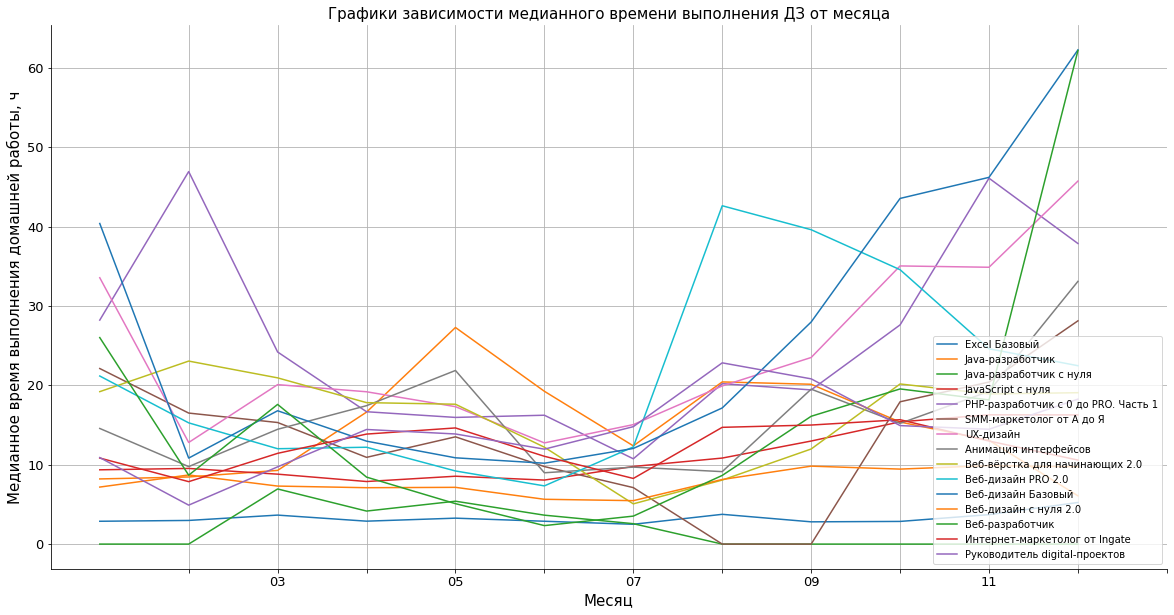

In [30]:
# (m) На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса
# с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. 
# Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно ⭐

### Вариант через sns.lineplot

# fig, ax = plt.subplots(figsize=(15,8))

# sns.lineplot(data=main_3_3_expl_sort)
# sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False) # убираем рамку

# ax.set_title('Графики зависимости медианного времени выполнения ДЗ от месяца', size=15)
# ax.set_xlabel('Месяц', size=14)
# ax.set_ylabel('Медианное время выполнения домашней работы, ч', size=14)
# ax.set_xticklabels(main_3_3_expl_sort.index)
# ax.grid()


# plt.show()


k = main_3_3_expl_sort.plot(figsize=(20,10))

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False) # убираем рамку
k.set_title('Графики зависимости медианного времени выполнения ДЗ от месяца', size=15)
k.set_xlabel('Месяц', size=15)
k.set_ylabel('Медианное время выполнения домашней работы, ч', size=15)
k.set_xticks(list(range(1, 12)) + [12])
k.legend(loc=4, fontsize=10)

plt.grid()
plt.tick_params(labelsize=13)
plt.show()

## Выводы по заданию №3

Ниже приведены данные на основе анализа предоставленных датасетов. <br>

#### Выводы по времени выполнения домашних заданий:

      * Интернет-маркетолог от Ingate - Юридическая сторона рекламы - модуль, на выполнение ДЗ к которому тратят меньше всего времени, в среднем 1 ч;
      * PHP-разработчик с 0 до PRO. Часть 1 - Курсовая работа - модуль, на выполнение ДЗ к которому тратят больше всего времени, в среднем 89 ч;
      * Прослеживается прямая зависимость времени выполнения домашних работ от продвижения студента по программе курса - вводные модули проходятся быстрее чем модули с курсовыми или дипломными работами;
      * Из формы графиков можно сделать вывод об уровне сложности итоговых модулей - если перепад во времени выполнения начальных и финальных модулей слишком резок, возможно стоит добавить промежуточные модули. Резкие скачки во времени выполнения могут свидетельствовать о высокой сложности дипломных и курсовых работ, к которым пользователи не до конца готовы.
                
#### Выводы по сезонности выполнения домашних заданий:
    
      * Анализируя графики медианного времени выполнения домашних заданий по месяцам года, можно заметить, что в летние месяцы года пользователи тратят в среднем меньше времени на их выполнение. Это может быть связано с периодом отпусков и каникул, во время которых многие уделяют учёбе больше времени. Также это может быть связано с периодами набора на обучение новых групп пользователей;
      * Начиная с октября по многим курсам можно заметить увеличение срока выполнения домашних заданий, это может быть связано, как с увеличением загрузки пользователей на работе/учёбе, так со временем выполнения курсовых или дипломных работ на курсах.
       
      
#### Общий вывод

Из полученных данных можно сделать следующие заключения:
* сложность выполнения домашних заданий возрастает по мере продвижения в рамках курса;
* есть курсы у которых значительная разница во времени выполнения обычных ДЗ и дипломных/курсовых работ;
* присутствует элемент сезонности - летом ДЗ выполняются, в среднем, быстрее чем зимой.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [85]:
### YOUR CODE HERE ###
# (p) Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле 
# (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, 
# сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

main_4 = main[((main['is_homework'] == 1))]
main_4
main_4_done = main[((main['is_homework'] == 1) & (main['status'] == "done"))]
main_4_done

# находим начальные уроки с ДЗ в модулях
main_4_modul_min = main_4.groupby(['course_title', "module_title", 'course_field', 
                                   'module_number']).agg({'lesson_number':"min"})

# находим количество приступивших к начальному модулю
main_4_modul_start = main_4_modul_min.merge(main_4, how='left', on=['course_title', 'module_title', 
                                                                    'lesson_number', 'course_field', 'module_number'])
main_4_modul_start_count = main_4_modul_start.groupby(['course_title', 
                                                       "module_title", 'course_field', 
                                                       'module_number'])['student_id'].agg(['count']).reset_index()

# находим последние уроки в модулях
main_4_modul_dif = main_4.groupby(['course_title', "module_title", 
                                   'course_field', 'module_number'])['lesson_number'].agg(['min', 'max'])
main_4_modul_dif = main_4_modul_dif[(main_4_modul_dif["max"] > main_4_modul_dif["min"])].reset_index()
main_4_modul_max = main_4_modul_dif.rename({'max': 'lesson_number'}, axis=1)
del main_4_modul_max['min']

# объединяем с основным датасетом оставляя только студентов выполнивших последние уроки в модулях
main_4_modul_max_merge = main_4_modul_max.merge(main_4_done, how='left', 
                                                on=['course_title', 'module_title', 'lesson_number', 
                                                    'course_field', 'module_number'])
main_4_modul_max_count = main_4_modul_max_merge.groupby(['course_title', 
                                                         "module_title", 'course_field', 
                                                         'module_number'])['student_id'].agg(['count']).reset_index()

# считаем количество студентов выполнивших дз в каждом модуле в первом уроке 
# (т.к. для большинства модулей он является и последним)
main_4_modul_start_done = main_4_modul_min.merge(main_4_done, how='left', 
                                                 on=['course_title', 'module_title', 
                                                     'lesson_number', 'course_field', 'module_number'])
main_4_modul_start_done_count = main_4_modul_start_done.groupby(['course_title', 
                                                                 "module_title", 'course_field', 
                                                                 'module_number'])['student_id'].agg(['count']).reset_index()

# объединяем таблицы с количеством студентов выполнивших дз по начальным и конечным урокам в модуле
main_4_modul_done_count = main_4_modul_start_done_count.merge(main_4_modul_max_count, 
                                                              how='left', on=['course_title', 'module_title', 
                                                                              'course_field', 'module_number'])

# создаём столбец done с количеством студентов выполнивших дз по каждому модулю
main_4_modul_done_count['done'] = np.where(main_4_modul_done_count["count_y"] < main_4_modul_done_count["count_x"], 
                                           main_4_modul_done_count["count_y"], main_4_modul_done_count["count_x"])
main_4_modul_done_count.sort_values(by='done').head(50)
main_4_modul_done = main_4_modul_done_count[['course_title', 'module_title', 'done', 'course_field']]
main_4_modul_done#.sort_values(by='done')

# объединяем чтобы получить столбцы count и done в одном датафрейме
main_4_modul_fin = main_4_modul_start_count.merge(main_4_modul_done, how='left', 
                                                  on=['course_title', 'module_title', 'course_field'])
main_4_modul_fin = main_4_modul_fin.sort_values(by=['course_title', 'module_number'])

# сдвигаем значения между модулями (выполнили предыдущий - начали новый)
main_4_modul_fin['done_shifted'] = main_4_modul_fin.groupby(['course_title'])['done'].shift(1)

# создаём столбец с процентом переходов
main_4_modul_fin['conversion'] = (main_4_modul_fin['count'] / main_4_modul_fin['done_shifted'] * 100)

# удаляем нулевые значеня
main_4_modul_fin.replace([np.inf, -np.inf], np.nan, inplace=True)
main_4_modul_fin

#[(main_4_modul_fin['course_title'] == 'Анимация интерфейсов')]
# main_4_modul_fin_zzzz = main_4_modul_fin[main_4_modul_fin['course_title'] == 'SMM-маркетолог от А до Я']
# main_4_modul_fin_zzzz

,course_title,module_title,course_field,module_number,count,done,done_shifted,conversion
1,Excel Базовый,Основной функционал Excel,Business,1,518,458.0,NaN,NaN
2,Excel Базовый,Основной функционал Excel (продолжение),Business,2,434,406.0,458.0,94.759825
5,Excel Базовый,Формулы и функции Excel. Введение,Business,3,398,387.0,406.0,98.029557
6,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,Business,4,345,303.0,387.0,89.147287
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,Business,5,298,270.0,303.0,98.349835
...,...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,Business,12,95,88.0,98.0,96.938776
178,Руководитель digital-проектов,Интеграционные проекты.,Business,13,87,69.0,88.0,98.863636
189,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,Business,14,71,64.0,69.0,102.898551
181,Руководитель digital-проектов,Основы технической грамотности,Business,15,66,64.0,64.0,103.125000


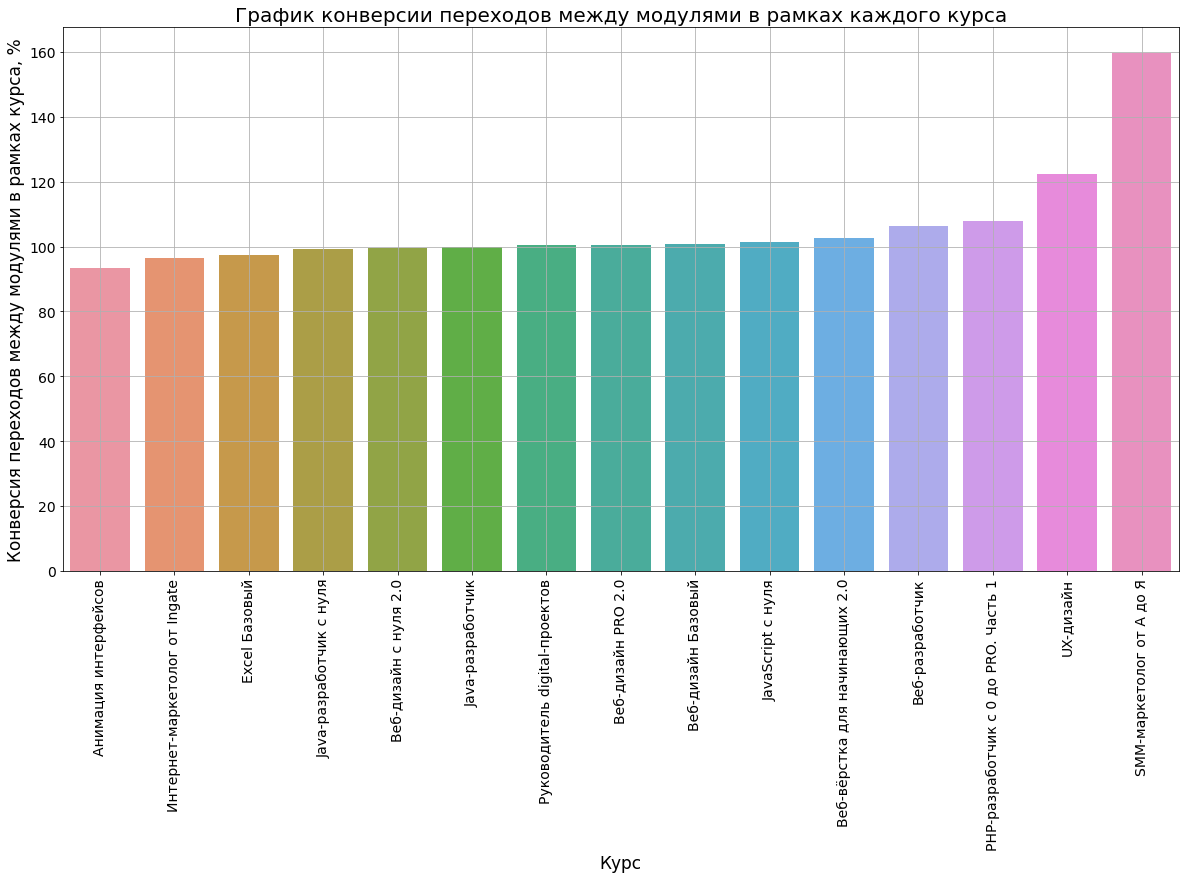

In [86]:
# (m) Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

main_4_modul_fin_2 = main_4_modul_fin.groupby(['course_title'])['conversion'].agg('mean').reset_index()
main_4_modul_fin_2 = main_4_modul_fin_2.sort_values(by='conversion')
main_4_modul_fin_2

f,ax=plt.subplots(figsize=(20,10))

sns.barplot(y='conversion', x='course_title', data=main_4_modul_fin_2.sort_values(by='conversion'))
ax.set_title("График конверсии переходов между модулями в рамках каждого курса", fontsize=20)
ax.set_xlabel('Курс', fontsize=17)
ax.set_ylabel('Конверсия переходов между модулями в рамках курса, %', fontsize=17)
ax.tick_params(labelsize=14, axis='x', rotation=90)
ax.tick_params(labelsize=14)
# ax.set_yticks(ticks=list(range(0, 110, 10)))
ax.grid()

plt.show()

C:\Users\smokovenko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


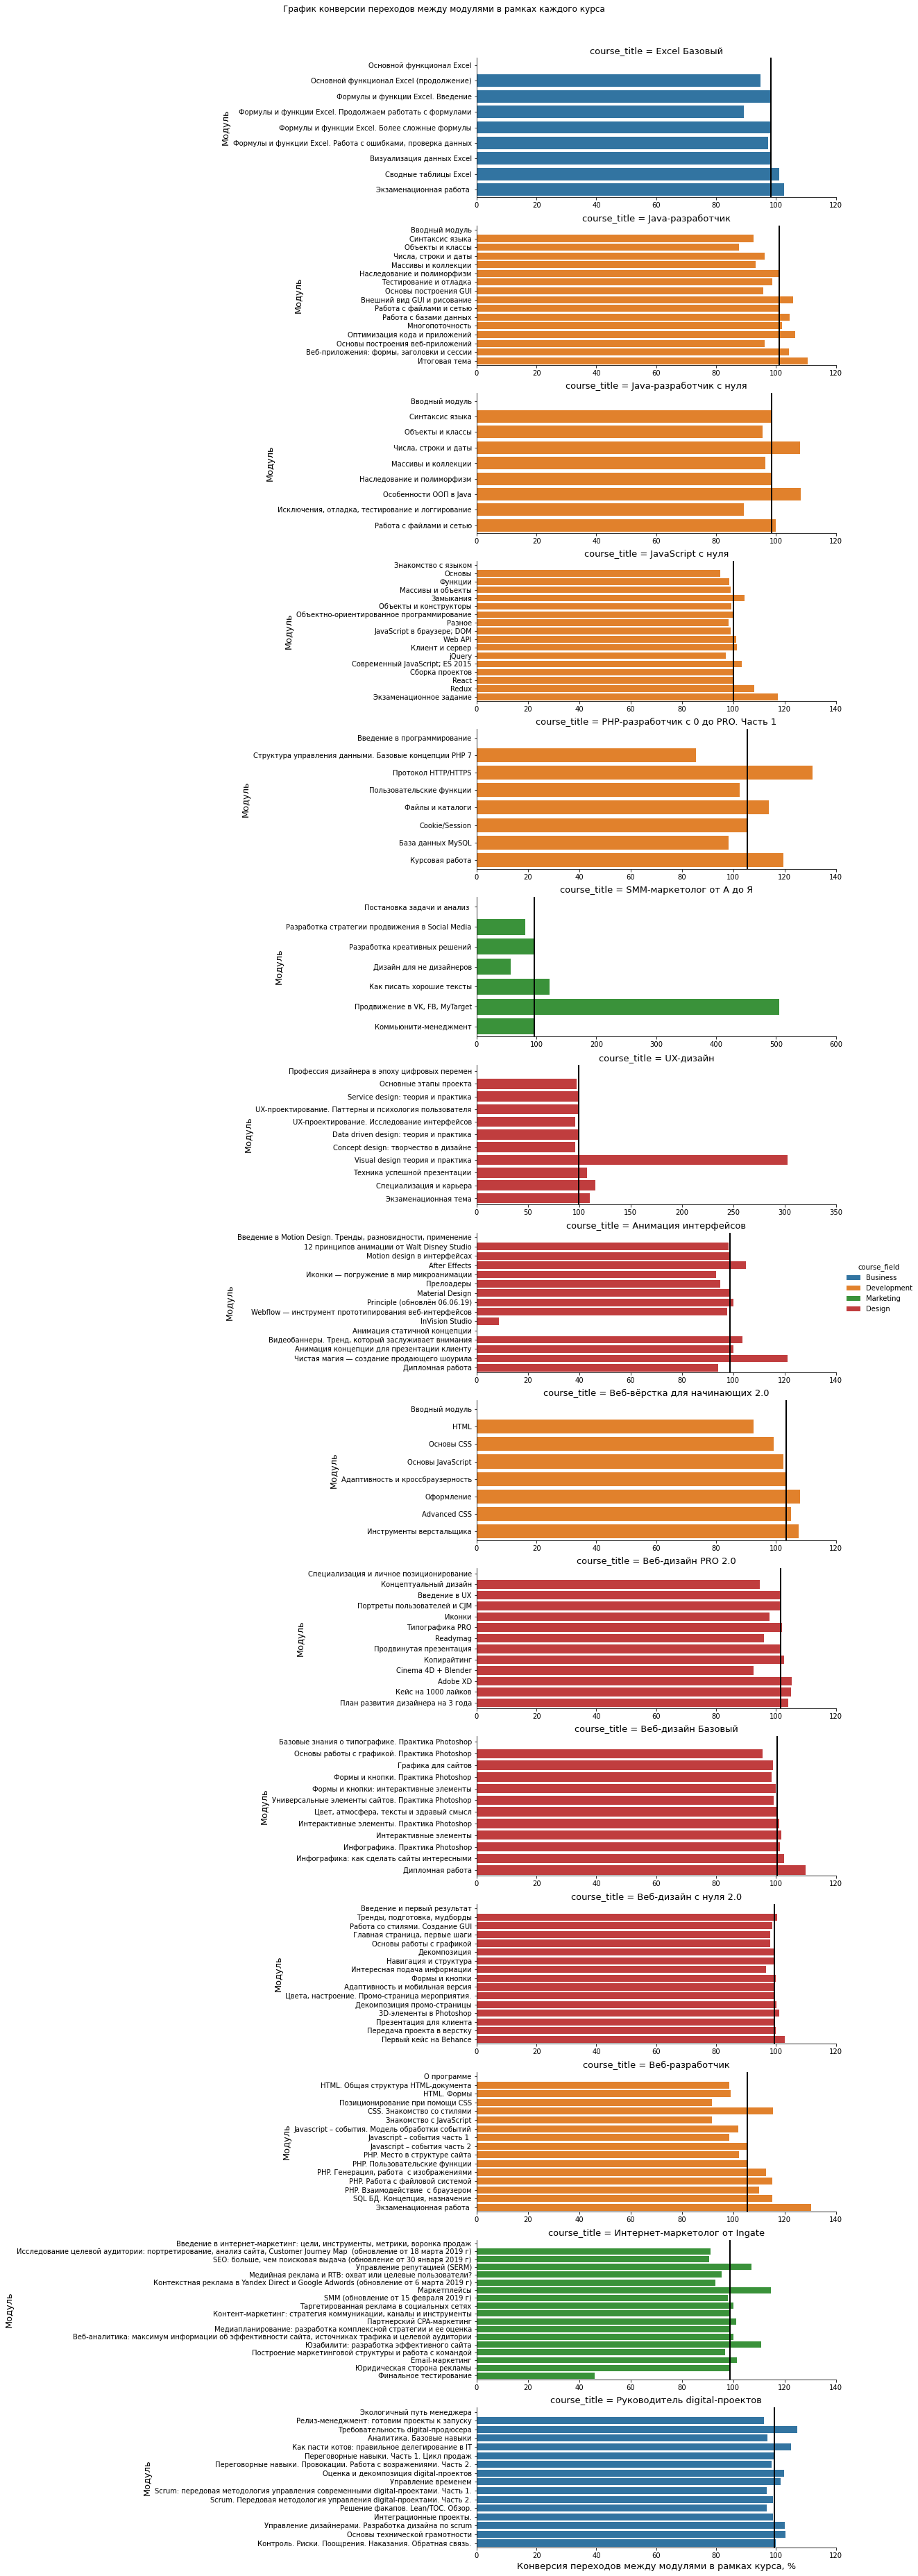

In [87]:
# (m) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, 
# отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. 
# Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). 
# Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. 
# У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

main_4_modul_fin

# добавляем функцию для прорисовки средней линии на каждом графике
def vertical_median_line(x, **kwargs):
    plt.axvline(x.median(), color='k', lw=2)
    
# строим графики
j = sns.FacetGrid(main_4_modul_fin, row='course_title', height=3.5, 
                  aspect=5, hue='course_field',
                 sharex=False, sharey=False, legend_out=True)

# указываем тип графика и оси
j.map(sns.barplot, 'conversion', 'module_title')
j.map(vertical_median_line, 'conversion')

j.fig.subplots_adjust(top=0.96) # устанавливаем отступ заголовка
j.set_xlabels('Конверсия переходов между модулями в рамках курса, %', size=13)
j.set_ylabels('Модуль', size=13)
j.fig.suptitle("График конверсии переходов между модулями в рамках каждого курса")
j.set_titles(size=13) # устанавливаем размер шрифта заголовка
j.set_xticklabels(size=10) # устанавливаем размер шрифта по оси х
j.set_yticklabels(size=10) # устанавливаем размер шрифта по оси у

j.add_legend() # устанавливаем легенду
plt.show()

## Выводы по заданию №4

Ниже приведены данные на основе анализа предоставленных датасетов. <br>

#### Выводы по конверсии перехода студентов из одного модуля в другой на каждом курсе:

      * Наименьшая средняя конверсия переходов между модулями выявлена в курсе Анимация интерфейсов - 93.4%;
      * Наименьшее количество сданных работ выявлено в курсе Анимация интерфейсов в модуле	InVision Studio - 0%;
      * Наибольшая средняя конверсия переходов между модулями выявлена в курсе SMM-маркетолог от А до Я -	159.6%;
      * Наибольшая конверсия переходов между модулями выявлена в курсе SMM-маркетолог от А до Я в модуле Продвижение в VK, FB, MyTarget - 505.6%;
      * На предоставленных графиках можно увидеть проблемные модули в курсах.
             
#### Общий вывод

Из полученных данных можно сделать следующие заключения:
* можно считать модули с конверсией переходов менее 30% проблемными. Особенно стоит выделить модуль InVision Studio в курсе Анимация интерфейсов - конверсия по данному модулю составляет 0%;
* Стоит обратить внимание на потенциально проблемные модули в следующих курсах: Анимация интерфейсов, SMM-маркетолог от А до Я, UX-дизайн;
* Прежде всего выбросы в значениях связаны с пропуском/не сдачей подавляющего большинства студентов предшествующего модуля. Это может быть связано как с поздним сроком запуска модуля, так и с его необязательностью к выполнению.
* В целом, лишь в трёх курсах присутствуют потенциально проблемные модули. В большей части курсов конверсия переходов между модулями распределена равномерно.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [34]:
### YOUR CODE HERE ###


